# In the following project we will be predicting whether a customer will leave a bank or not based on different factors
 

1- credit score
2-Location of the customer
3-Gender
4-Age
5-Tenure
6-Account Balance
7-Number of bank products a custotomer uses
8- Has credit card
9-Is active member or not
10-Estimated salary

#  About the dataset


I have taken the dtaset from Kaggle.The main objective of the project is to predict whether the customer will leave the bank or not, based on the customer's demograpics and financial information included in the dataset.


It contains 1000 rows and 14 columns, main objective is that the dataset has several factors which can influence the customer to leave the bank which I have termed as independent variables and the my target variable is the customer decision to leave the bank or not.

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA PREPROCESSING 1

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


# Dropping the unecessary colums-RowNumber,CustomerID,Surname

In [8]:
df=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Checking for the null/missing values

In [10]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Duplicate values

In [11]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

# Renaming the column 'Exited' to 'churn'

In [12]:
#rename column
df.rename(columns={'Excited':'Churn'}, inplace=True)

In [13]:
#descriptive statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Explorative Data Analysis


For explorative data Analysis. We will be looking at the distribution of the data,the coorelation between 
features and the target variable.

In [15]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

# Pie chart for the customer churn

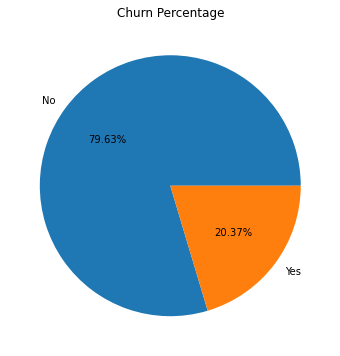

In [16]:
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),autopct='%1.2f%%',labels=['No','Yes'])
plt.title('Churn Percentage')  
plt.show()

In [17]:
import seaborn as sns

# Gender

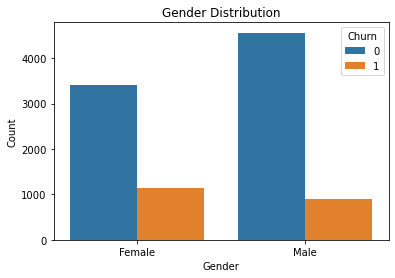

In [18]:
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#  For Credit score

<AxesSubplot:xlabel='Churn', ylabel='CreditScore'>

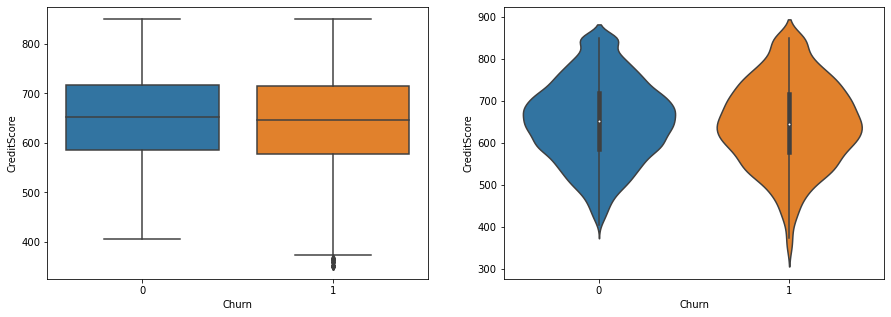

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

# AGE DISTRIBUTION

<AxesSubplot:xlabel='Age', ylabel='Count'>

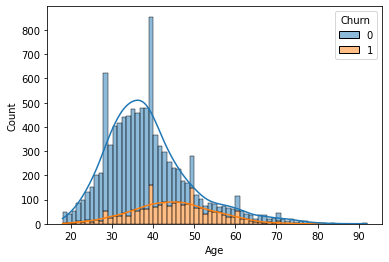

In [20]:
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

# LOCATION

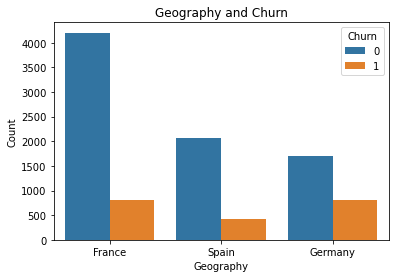

In [21]:
sns.countplot(x='Geography', hue='Churn', data=df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

# Tenure

<AxesSubplot:xlabel='Tenure', ylabel='count'>

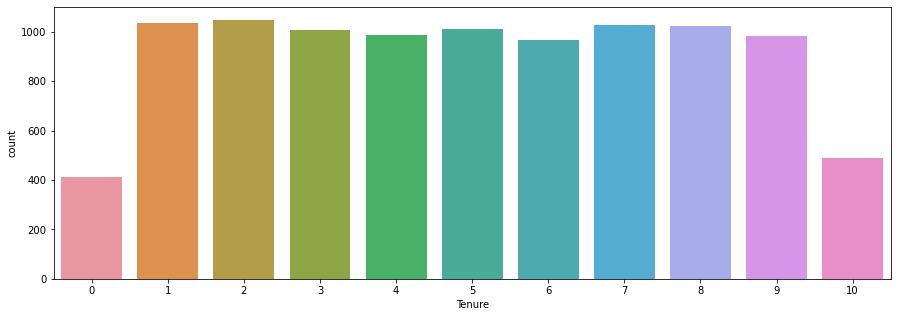

In [22]:
fig,x = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Tenure', data=df)


<AxesSubplot:xlabel='Tenure', ylabel='count'>

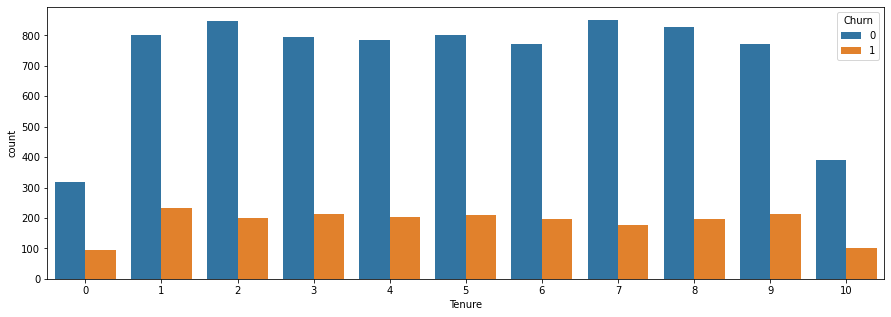

In [23]:
fig,x = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Tenure', hue='Churn', data=df)


# Bank balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

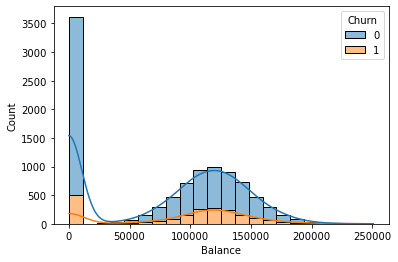

In [24]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)

#  Number of products purchased

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

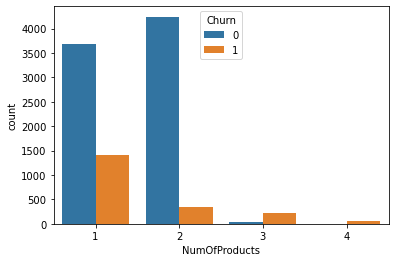

In [25]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

# Credit Card

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

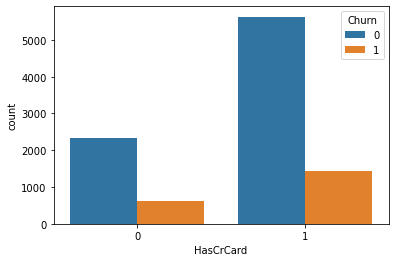

In [26]:
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])

# Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

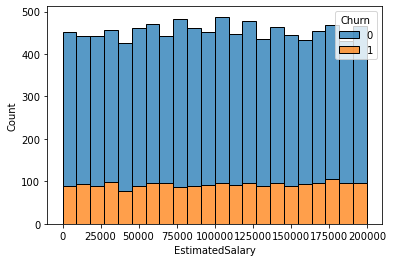

In [27]:
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack')

# Active Member

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

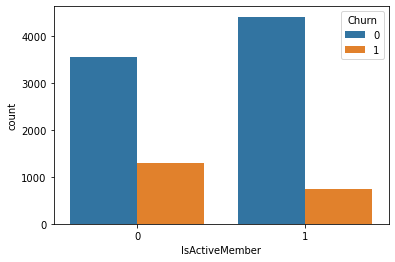

In [28]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)

# Data Preprocessing-2

# Label encoding the variables

In [29]:
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# NORMALIZATION

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

# Matrix Heatmap

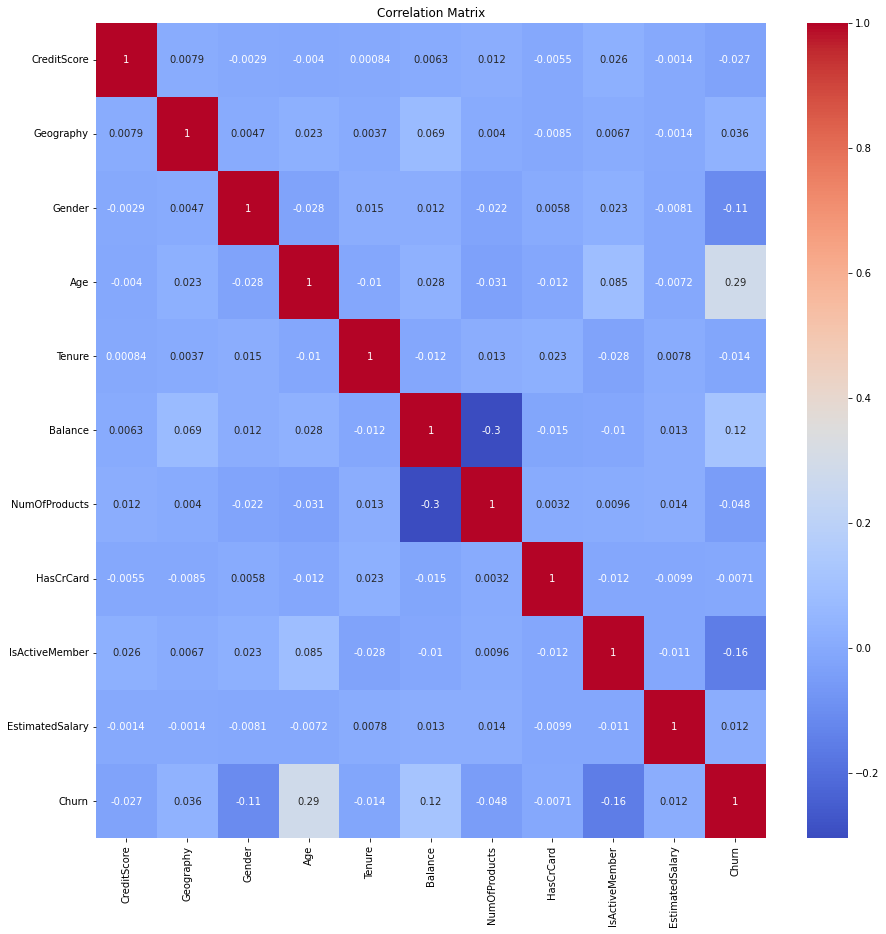

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#  Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'])

# Churn Prediction

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



#creat DECISION tree classifier object
dtree = DecisionTreeClassifier()


#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8.10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state':[0,42]
}

#creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)


#Fitting the grid search object to the taining data
grid_dtree.fit(x_train, y_train)


#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}


In [35]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [36]:
dtree.fit(x_train,y_train)

dtree.score(x_train,y_train)

0.8556

In [37]:
dtree_pred = dtree.predict(x_test)

#  Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

#creating Random forest classifier object
rfc = RandomForestClassifier()

#defining parameter range
param_grid ={
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'random_state':[0,42]
}



#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv =5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(x_train, y_train)

#Printing the best parameters
print('Best parameters found:', grid_rfc.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'max_depth': 8, 'min_samples_leaf': 2, 'random_state': 0}


In [39]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [40]:
#training the model
rfc.fit(x_train, y_train)
#model accuracy
rfc.score(x_train, y_train)

0.8778666666666667

# MODEL EVALUTION

# Decision Tree Classifier

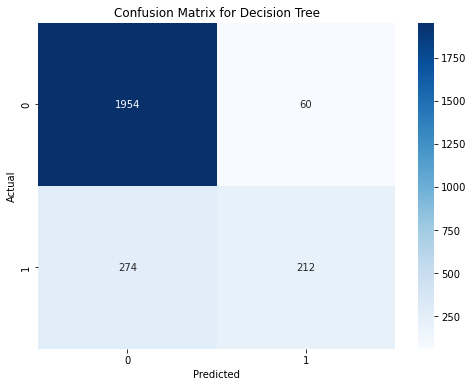

In [41]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Distribution plot

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Churn', ylabel='Density'>

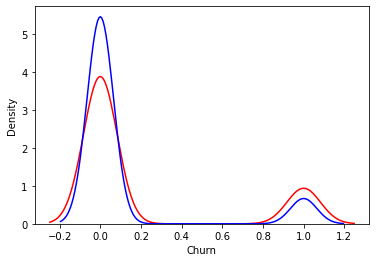

In [42]:
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(dtree_pred, hist=False, color='b', label='Fitted Values', ax=ax)

# Classification Report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2014
           1       0.78      0.44      0.56       486

    accuracy                           0.87      2500
   macro avg       0.83      0.70      0.74      2500
weighted avg       0.86      0.87      0.85      2500



In [44]:
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
print('Accuracy Score:',accuracy_score(y_test, dtree_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, dtree_pred))

Accuracy Score: 0.8664
Mean Absolute Error: 0.1336


# OVERALL CONCLUSION